## Advertising Agency Churn


A marketing agency has many customers that use their service to produce ads for the client/customer websites. They've noticed that they have quite a bit of churn in clients. 
Create a classification algorithm that will help classify whether or not a customer churned.

Bookmarks

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName("LogisticRegressionChurn").getOrCreate()

In [3]:
df = spark.read.csv('customer_churn.csv', inferSchema = True, header = True)

In [4]:
df.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Churn: integer (nullable = true)



In [5]:
df.show(3)

+----------------+----+--------------+---------------+-----+---------+-------------------+--------------------+--------------------+-----+
|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|       Onboard_date|            Location|             Company|Churn|
+----------------+----+--------------+---------------+-----+---------+-------------------+--------------------+--------------------+-----+
|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|2013-08-30 07:00:40|10265 Elizabeth M...|          Harvey LLC|    1|
|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|2013-08-13 00:38:46|6157 Frank Garden...|          Wilson PLC|    1|
|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|2016-06-29 06:20:07|1331 Keith Court ...|Miller, Johnson a...|    1|
+----------------+----+--------------+---------------+-----+---------+-------------------+--------------------+--------------------+-----+
only showing top 3 rows



In [6]:
for row in df.head(3):
    print (row,'\n')

Row(Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Onboard_date=datetime.datetime(2013, 8, 30, 7, 0, 40), Location='10265 Elizabeth Mission Barkerburgh, AK 89518', Company='Harvey LLC', Churn=1) 

Row(Names='Kevin Mueller', Age=41.0, Total_Purchase=11916.22, Account_Manager=0, Years=6.5, Num_Sites=11.0, Onboard_date=datetime.datetime(2013, 8, 13, 0, 38, 46), Location='6157 Frank Gardens Suite 019 Carloshaven, RI 17756', Company='Wilson PLC', Churn=1) 

Row(Names='Eric Lozano', Age=38.0, Total_Purchase=12884.75, Account_Manager=0, Years=6.67, Num_Sites=12.0, Onboard_date=datetime.datetime(2016, 6, 29, 6, 20, 7), Location='1331 Keith Court Alyssahaven, DE 90114', Company='Miller, Johnson and Wallace', Churn=1) 



In [7]:
# Feature Analysis
# df.columns: 'Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites'

In [8]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

root
 |-- Age: double (nullable = true)



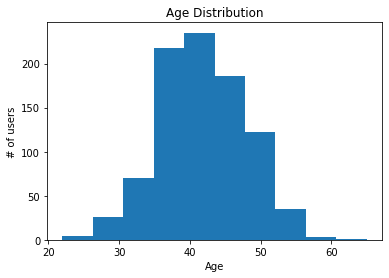

In [9]:
# Age

df.select('Age').printSchema()
age_Vect = df.select('Age').collect()

temp_age_Vect = age_Vect[0:1000]
temp_age_Vect = [t[0] for t in temp_age_Vect]
plt.title('Age Distribution')
plt.hist(temp_age_Vect)
plt.xlabel('Age')
plt.ylabel('# of users')
plt.show()
# Feature Engineering: Age - normalization

+--------------+
|Total_Purchase|
+--------------+
|       11066.8|
|      11916.22|
|      12884.75|
+--------------+
only showing top 3 rows

root
 |-- Total_Purchase: double (nullable = true)



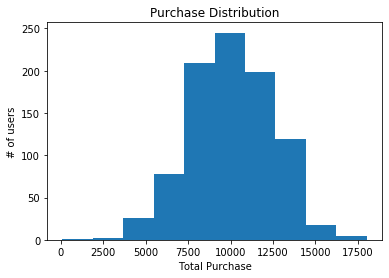

In [10]:
# Total_Purchase
purchase_Vect = df.select('Total_Purchase')
purchase_Vect.show(3)
purchase_Vect.printSchema()
temp_pruchase_Vect = purchase_Vect.collect()
temp_pruchase_Vect = [t[0] for t in temp_pruchase_Vect]
plt.title('Purchase Distribution')
plt.hist(temp_pruchase_Vect)
plt.xlabel('Total Purchase')
plt.ylabel('# of users')
plt.show()
# Feature Engineering: Total_Pruchase - normalization

In [11]:
# Account_Manager
acc_mngr_Vect = df.select('Account_Manager')

acc_mngr_Vect.printSchema()

acc_mngr_Vect.distinct().show()

# number of classes : 2
acc_mngr_Vect.groupBy('Account_Manager').count().show()

# Feature Engineering: Not required

root
 |-- Account_Manager: integer (nullable = true)

+---------------+
|Account_Manager|
+---------------+
|              1|
|              0|
+---------------+

+---------------+-----+
|Account_Manager|count|
+---------------+-----+
|              1|  433|
|              0|  467|
+---------------+-----+



root
 |-- Years: double (nullable = true)

+-----+
|Years|
+-----+
| 7.22|
|  6.5|
| 6.67|
+-----+
only showing top 3 rows



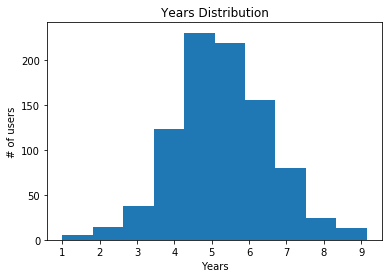

In [12]:
# Years
year_Vect = df.select('Years')
year_Vect.printSchema()
year_Vect.show(3)

temp_year_Vect = year_Vect.collect()
temp_year_Vect = temp_year_Vect[0:1000]
temp_year_Vect = [t[0] for t in temp_year_Vect]
plt.title('Years Distribution')
plt.hist(temp_year_Vect)
plt.xlabel('Years')
plt.ylabel('# of users')
plt.show()
# Feature Engineering: Years - normalization

root
 |-- Num_Sites: double (nullable = true)

+---------+
|Num_Sites|
+---------+
|      8.0|
|     11.0|
|     12.0|
+---------+
only showing top 3 rows



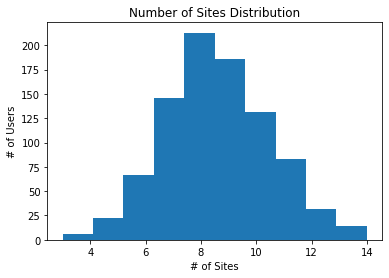

In [13]:
# Num_Sites

sites_Vect = df.select('Num_Sites')
sites_Vect.printSchema()
sites_Vect.show(3)

temp_sites_Vect = sites_Vect.collect()
temp_sites_Vect = temp_sites_Vect[0:1000]
temp_sites_Vect = [t[0] for t in temp_sites_Vect]
plt.title('Number of Sites Distribution')
plt.hist(temp_sites_Vect)
plt.xlabel('# of Sites')
plt.ylabel('# of Users')
plt.show()
# Feature Engineering: Years - normalization

Machine Learning
- <a href=#Libraries>Libraries</a>
- <a href=#FeatureEngineering>Feature Engineering</a>
- <a href=#MLModel>Machine Learning Model</a>
- <a href=#Pipeline>Pipeline</a>
- <a href=#DataPrep>Data prep</a>
- <a href=#TrainPipeline>Train Pipeline</a>
- <a href=#TestPipeline>Test Pipeline
- <a href=#ModelEval>Model Evaluation & Improvement
- <a href=#NewPred>New Predictions

<a name = 'Libraries' />Libraries

In [14]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

<a name= 'FeatureEngineering' />Feature Engineering

In [15]:
# Feature Engineering
# Features: 'Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites'

# Assembler - 1: to generate Scale Vector
assembler_1 = VectorAssembler(
    inputCols=['Age', 'Total_Purchase', 'Years', 'Num_Sites'],
    outputCol="featuresToScale")

# Feature Standardizer: Age, Total_Pruchase, Years, Num_Sites
scaler = StandardScaler(inputCol="featuresToScale", outputCol="scaledFeatures",withStd=True)

# Assembler - 2: to generate input to the model
assembler_2 = VectorAssembler(
    inputCols=["featuresToScale", "Account_Manager"],
    outputCol="features")

<a name='MLModel' />Machine Learning Model

In [16]:
lr_churn = LogisticRegression(labelCol='Churn')

<a name='Pipeline' />Pipeline

In [17]:
pipeline = Pipeline(stages = [assembler_1, scaler, assembler_2, lr_churn])

<a name='DataPrep'/>Data Prep

In [18]:
train, test = df.randomSplit([0.7,0.3])

<a name='TrainPipeline' />Train Pipeline

In [19]:
model = pipeline.fit(train)

<a name='TestPipeline' />Test Pipeline

In [20]:
prediction = model.transform(test)

<a name = 'ModelEval' />Model Evaluation & Improvement
Let's evaluate the results on the data set we were given (using the test data)

In [21]:
training_sum = model.stages[-1].summary
training_sum.predictions.select('prediction','Churn').describe().show()

+-------+-------------------+-------------------+
|summary|         prediction|              Churn|
+-------+-------------------+-------------------+
|  count|                606|                606|
|   mean|0.14686468646864687|0.17986798679867988|
| stddev| 0.3542633910736834| 0.3843947468250369|
|    min|                0.0|                0.0|
|    max|                1.0|                1.0|
+-------+-------------------+-------------------+



In [22]:
prediction.select('features','Churn','rawPrediction','probability', 'prediction').show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|Churn|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[36.0,12309.23,4....|    0|[2.53373311217810...|[0.9264730609348,...|       0.0|
|[29.0,9617.59,5.4...|    0|[4.84356653542960...|[0.99218268835105...|       0.0|
|[36.0,8918.52,3.6...|    0|[5.72440318027124...|[0.99674532600095...|       0.0|
|[39.0,6351.79,5.8...|    1|[6.60618214127997...|[0.99864984140028...|       0.0|
|[45.0,10976.03,4....|    0|[1.75971427147582...|[0.85317387110770...|       0.0|
|[32.0,12403.6,4.9...|    0|[6.23780849178853...|[0.99804967785656...|       0.0|
|[38.0,10298.29,5....|    0|[2.22516702989470...|[0.90248686330055...|       0.0|
|[40.0,12455.75,6....|    0|[0.88996477165996...|[0.70888290261990...|       0.0|
|[43.0,8601.01,5.6...|    1|[-1.5062554507499...|[0.18149439830457...|       1.0|
|[39.0,8880.17,4

In [23]:
churn_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                           labelCol='Churn')

In [24]:
auc = churn_eval.evaluate(prediction)
print (round(auc,2))

0.78


<a name = 'NewPred' />New Predictions

In [25]:
new_customers = spark.read.csv('new_customers.csv',inferSchema=True,
                              header=True)

final_results = model.transform(new_customers)

In [26]:
final_results.select('Names','prediction').show()

+--------------+----------+
|         Names|prediction|
+--------------+----------+
| Andrew Mccall|       0.0|
|Michele Wright|       1.0|
|  Jeremy Chang|       1.0|
|Megan Ferguson|       1.0|
|  Taylor Young|       0.0|
| Jessica Drake|       1.0|
+--------------+----------+

